In [2]:
import wfdb
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

JS02973
/Users/matildacotton/Desktop/semester 2 2024/topics/code/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/03/038/JS02973


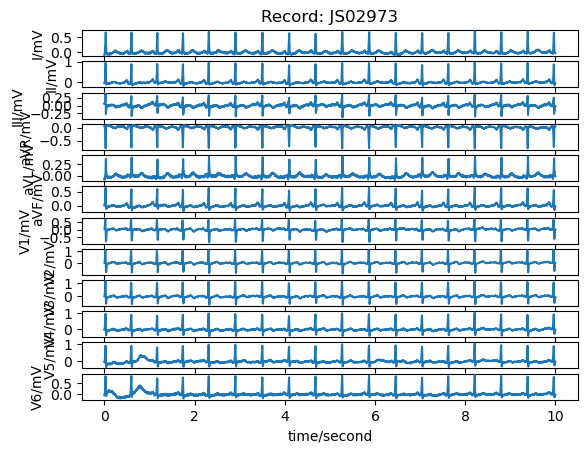

In [3]:
ecg_data = os.path.join(os.getcwd(), 'a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords')

hea_files = []
mat_files = []

for root, dirs, files in os.walk(ecg_data):
    for file in files:
        if file.endswith('.hea'):
            hea_files.append(os.path.join(root, file))
        elif file.endswith('.mat'):
            mat_files.append(os.path.join(root, file))

base_name = os.path.splitext(os.path.basename(mat_files[0]))[0]

print (base_name)
    
mat_path = os.path.join(os.path.dirname(mat_files[1]), base_name)

print (mat_path)

record = wfdb.rdrecord(mat_path)
wfdb.plot.plot_wfdb(record)

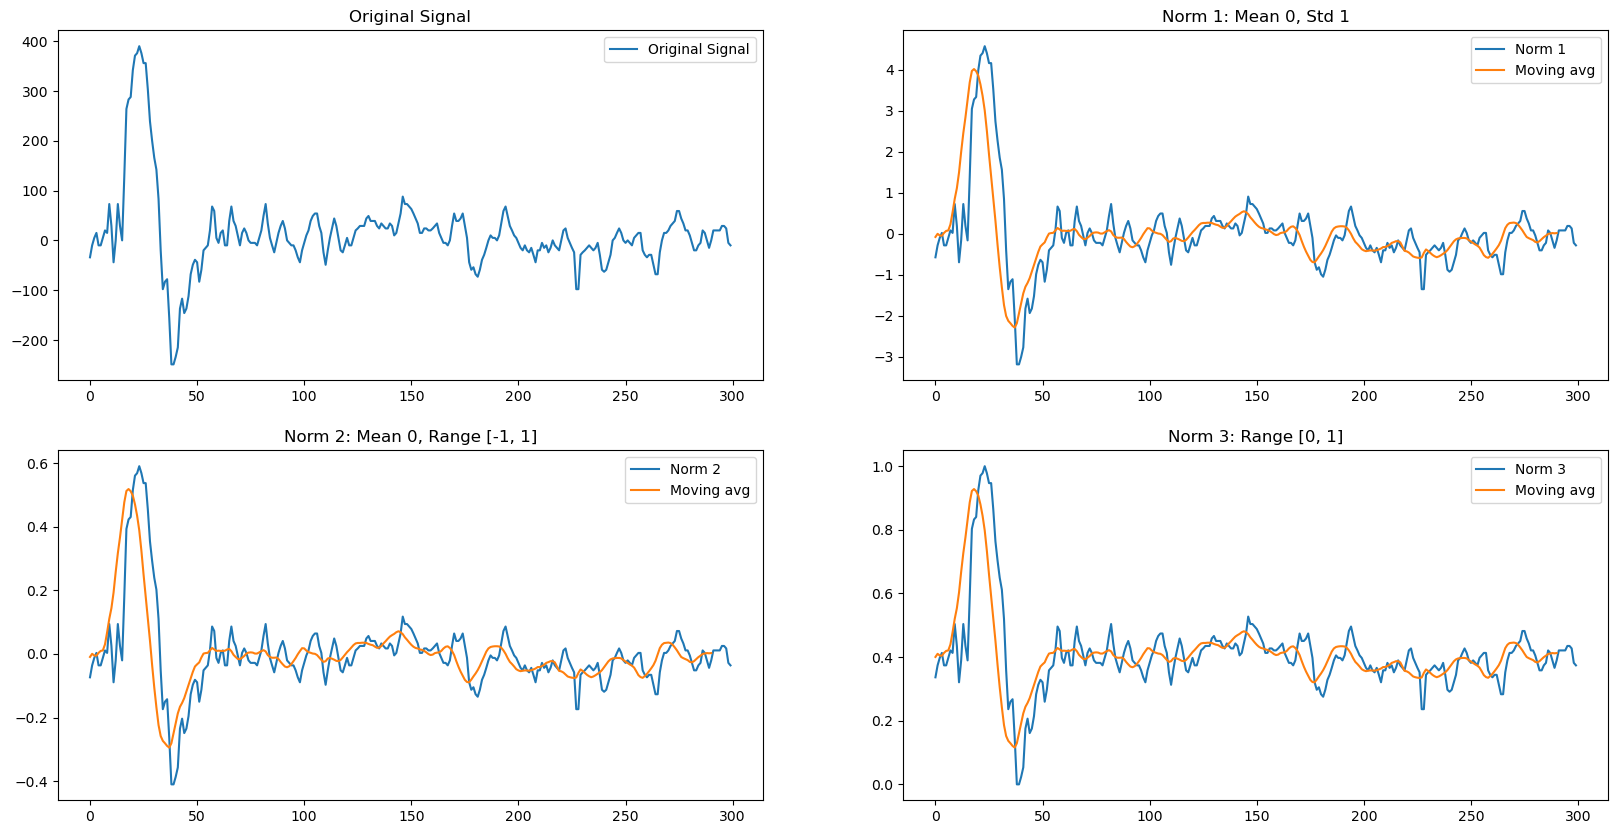

In [8]:
ecg = sio.loadmat('a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/01/010/JS00001.mat')['val'].reshape((-1))

length = 300 
window = 10  

start_idx = np.random.randint(0, len(ecg) - length)
segment = ecg[start_idx:start_idx + length]

# Moving average function
def moving_average(signal, window):
    return np.convolve(signal, np.ones(window) / window, mode='valid')

# Normalization functions
def z_norm_b(signal):
    return (signal - np.mean(signal)) / np.std(signal)

def z_norm2(signal):
    return (signal - np.mean(signal)) / (np.max(signal) - np.min(signal))

def z_norm(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Create the comparison plot
plt.figure(figsize=(20, 10))

# Plot Original Signal
plt.subplot(221)
plt.plot(segment, label='Original Signal')
# plt.plot(moving_average(segment, window), label='Moving avg')
plt.legend()
plt.title('Original Signal')

# Plot Normalization 1
plt.subplot(222)
norm1 = z_norm_b(segment)
plt.plot(norm1, label='Norm 1')
plt.plot(moving_average(norm1, window), label='Moving avg')
plt.legend()
plt.title('Norm 1: Mean 0, Std 1')

# Plot Normalization 2
plt.subplot(223)
norm2 = z_norm2(segment)
plt.plot(norm2, label='Norm 2')
plt.plot(moving_average(norm2, window), label='Moving avg')
plt.legend()
plt.title('Norm 2: Mean 0, Range [-1, 1]')

# Plot Normalization 3
plt.subplot(224)
norm3 = z_norm(segment)
plt.plot(norm3, label='Norm 3')
plt.plot(moving_average(norm3, window), label='Moving avg')
plt.legend()
plt.title('Norm 3: Range [0, 1]')

plt.show()
